In [60]:
import torch
from torch import nn

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [62]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")

image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} already exists")
else:
    print(f"{image_path} do not exists")
    image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloaded pizza_steak_suchi.zip...")
    f.write(request.content)
    
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipped pizza_steak_suchi.zip...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi already exists
Downloaded pizza_steak_suchi.zip...
Unzipped pizza_steak_suchi.zip...


In [63]:
# walking thorugh the directory
import os

def walk_through_dir(dir_path):
    """walk_through_dir returning its contents.
    
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [64]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [65]:
#set um test and train directories

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [66]:
### visualizing the data

steak
Random image path: data/pizza_steak_sushi/train/steak/1849463.jpg
Random image class: steak
Hight: 512, Width: 512


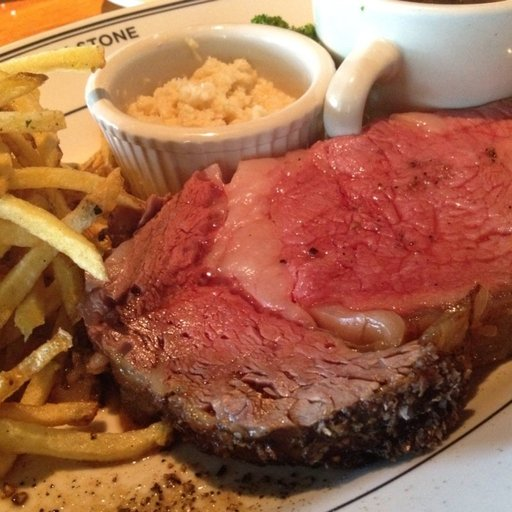

In [67]:
import random
from PIL import Image


#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

#print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Random image class: {image_class}")
print(f"Hight: {img.height}, Width: {img.width}")

img


In [68]:
#vizualization with matplotlib
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

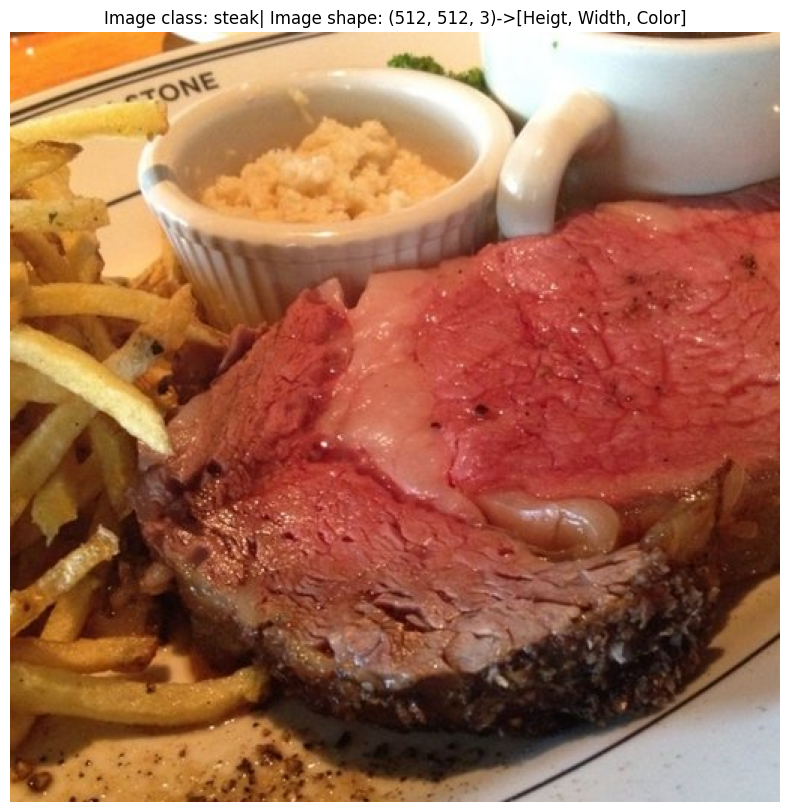

In [69]:
#into array:

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 10))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}| Image shape: {img_as_array.shape}->[Heigt, Width, Color]")
plt.axis("off")

In [70]:
img_as_array[:1]

array([[[130,  57,  22],
        [123,  59,  23],
        [111,  65,  29],
        ...,
        [240, 203, 159],
        [241, 207, 162],
        [246, 212, 167]]], shape=(1, 512, 3), dtype=uint8)

In [71]:
#transofming data

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [72]:
data_transform(img)

tensor([[[0.8275, 0.8902, 0.9529,  ..., 0.8000, 0.8549, 0.8784],
         [0.9804, 0.9765, 0.9843,  ..., 0.7843, 0.7529, 0.7216],
         [0.9922, 0.9843, 0.9843,  ..., 0.6627, 0.6549, 0.6471],
         ...,
         [0.4824, 0.4392, 0.4941,  ..., 0.7529, 0.7529, 0.7529],
         [0.6431, 0.4863, 0.4275,  ..., 0.7569, 0.7569, 0.7608],
         [0.8118, 0.6941, 0.6353,  ..., 0.7490, 0.7569, 0.7608]],

        [[0.4745, 0.4549, 0.4941,  ..., 0.6667, 0.7294, 0.7647],
         [0.5569, 0.6314, 0.6039,  ..., 0.7451, 0.7176, 0.6784],
         [0.5843, 0.6039, 0.5961,  ..., 0.6706, 0.6471, 0.6235],
         ...,
         [0.2471, 0.2000, 0.2667,  ..., 0.7804, 0.7882, 0.7882],
         [0.3961, 0.2627, 0.2039,  ..., 0.7843, 0.7922, 0.7961],
         [0.5804, 0.4627, 0.4078,  ..., 0.7843, 0.7922, 0.7961]],

        [[0.2196, 0.1608, 0.1569,  ..., 0.5451, 0.5882, 0.6196],
         [0.1882, 0.2902, 0.1882,  ..., 0.6745, 0.6471, 0.6118],
         [0.1490, 0.1804, 0.1569,  ..., 0.6471, 0.6235, 0.

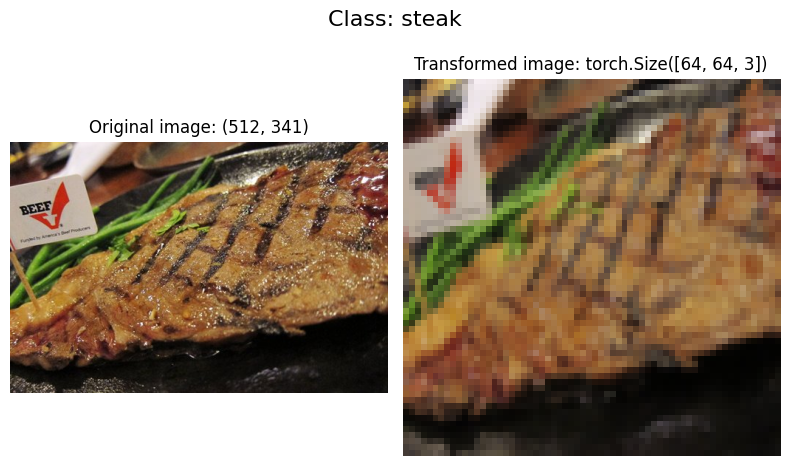

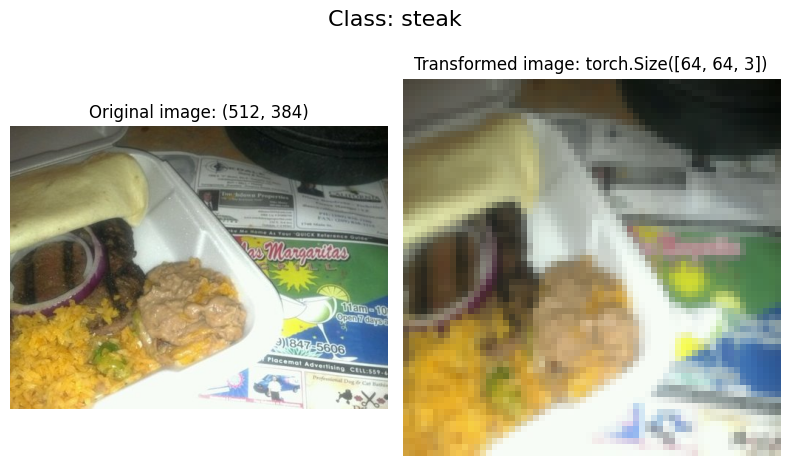

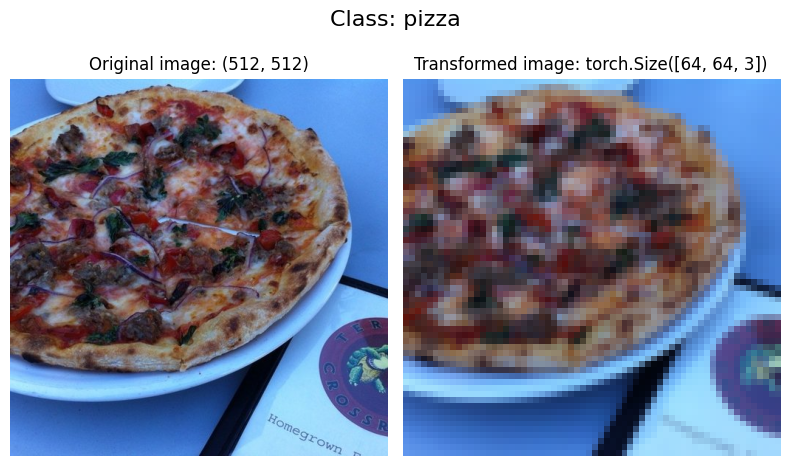

In [73]:
import random
from PIL import Image
import matplotlib.pyplot as plt

def plot_transform_image(image_path: list, transform, n=3, seed=None):
    """Select images from a list of image paths and plot them with transformations."""
    if seed:
        random.seed(seed)
    random_image_path = random.sample(image_path, k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
            # Plot the original image
            ax[0].imshow(f)
            ax[0].set_title(f"Original image: {f.size}")
            ax[0].axis(False)

            # Transform and plot the transformed image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed image: {transformed_image.shape}")
            ax[1].axis(False)

            # Add a suptitle
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            plt.tight_layout()
            plt.show()

# Example usage
plot_transform_image(image_path=image_path_list,
                     transform=data_transform,
                     n=3,
                     seed=None)


In [74]:
#into tensors:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform,
                                 target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [75]:
class_dic = train_data.class_to_idx
class_dic

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [76]:
len(train_data), len(test_data)

(225, 75)

In [77]:
img, label = train_data[0][0], train_data[0][1]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [80]:
label

0

In [82]:
class_names = train_data.classes

original shape: torch.Size([3, 64, 64]), permute shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

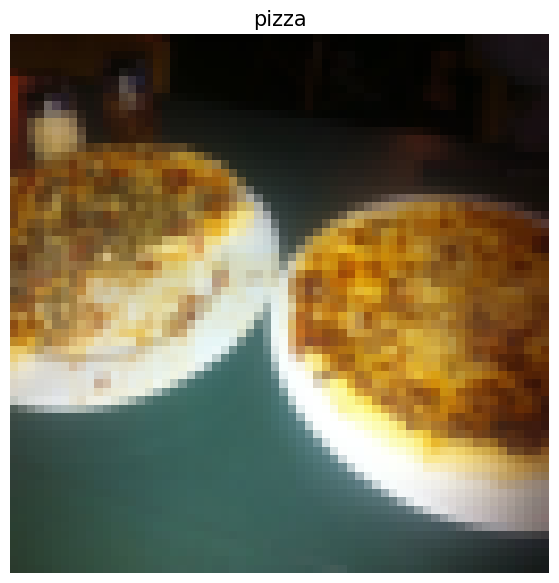

In [83]:
img_permute = img.permute(1,2,0)

print(f"original shape: {img.shape}, permute shape: {img_permute.shape}")


plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=15)



In [84]:
#load images into dataLoader

In [85]:
BATCH_SIZE = 1
train_dataLoader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)

test_dataLoader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=False)

len(train_dataLoader), len(test_dataLoader)


(225, 75)

In [86]:
img, label = next(iter(train_dataLoader))

print(f"Image shape: {img.shape}-> [batch_size, color, height, width], \nLabel: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])-> [batch_size, color, height, width], 
Label: torch.Size([1])


In [87]:
import os, pathlib
from PIL import Image
from torchvision import transforms
from typing import Tuple, Dict, List

In [88]:
train_data.classes, test_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [89]:
target_directory = train_dir
print(f"target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [90]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Find the class folders in a dataset."""
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        return FileNotFoundError(f"Couldn't find any class folders in {directory}.")
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [91]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [92]:
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform = None):
        self.path = list(pathlib.Path(targ_dir).glob("*/*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index: int) -> Image.Image:
        image_path = self.path[index]
        return Image.open(image_path)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx
            

In [93]:
from torchvision import transforms
train_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                     transforms.ToTensor()])



In [94]:
train_data_custom = ImageFolderCustom(train_dir, train_transform)
test_data_custom = ImageFolderCustom(test_dir, test_transform)

In [95]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x12b3d62a0>,
 <__main__.ImageFolderCustom at 0x11a9cf860>)

In [96]:
print(train_data_custom.classes == test_data_custom.classes)


True


In [102]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    """Display n_images from a dataset."""
    if n>10:
        n=10
        display_shape = False
        print(f" n sholudnt be larger than 10")
    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    
    plt.figure(figsize=(16, 8))
    
    
    
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        
        targ_image_adjust = targ_image.permute(1, 2, 0)
        
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)
        
        

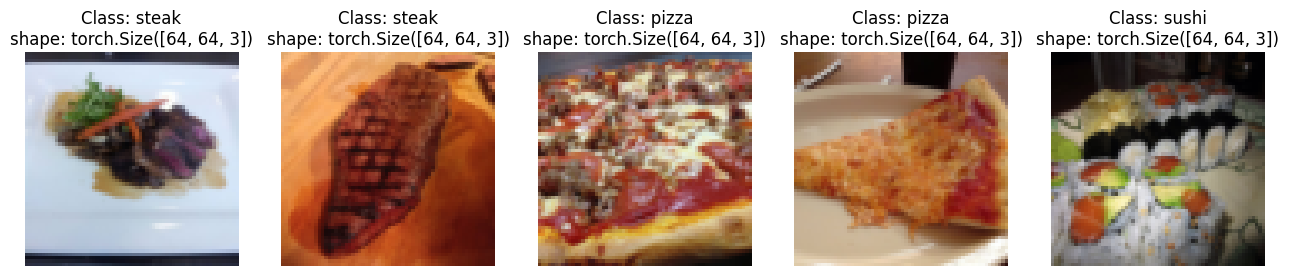

In [103]:
display_random_images(train_data,
                      n = 5,
                      classes = class_names,
                      seed=None)